In [3]:
import yfinance as yf
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt


/var/folders/yl/gn9fldpj69169vhn466y4klh0000gn/T/ipykernel_68524/4229952999.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(TICKER, start = '2000-01-01')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume,12_ema,27_ema,MACD,Signal,MACD_hist,Strategy,Asset_Returns,Strategy_Returns
Date,,,,,,,,,,,,,
2021-10-25,430.673828,431.004721,427.686411,429.473189,45214500,430.673828,430.673828,0.000000,0.000000,0.000000,NaN,NaN,NaN
2021-10-26,431.061401,433.453245,430.683250,432.233708,56075100,430.883764,430.874792,0.008972,0.004984,0.003987,-1.0,0.000900,-0.000900
2021-10-27,429.151703,432.195870,429.076055,431.524649,72438000,430.207740,430.257378,-0.049638,-0.017402,-0.032236,1.0,-0.003534,-0.005326
2021-10-28,433.292603,433.368221,430.579329,430.588763,51437900,431.181510,431.102498,0.079013,0.015259,0.063754,-1.0,0.006081,-0.014924
2021-10-29,434.171783,434.464853,430.683281,430.976350,70162400,431.993957,431.810532,0.183425,0.065284,0.118140,1.0,0.008122,-0.012925
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-10-13,663.039978,665.130005,659.770020,660.650024,79560500,664.929824,660.260129,4.669694,6.210895,-1.541201,-1.0,0.539541,-0.165264
2025-10-14,662.229980,665.830017,653.169983,657.169983,88779600,664.514463,660.400833,4.113630,5.791442,-1.677812,-1.0,0.537660,-0.164244
2025-10-15,665.169983,670.229980,658.929993,666.820007,81702600,664.615312,660.741487,3.873826,5.407919,-1.534093,-1.0,0.544487,-0.167954


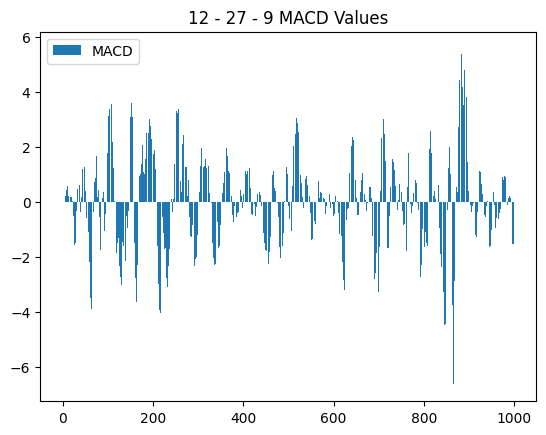

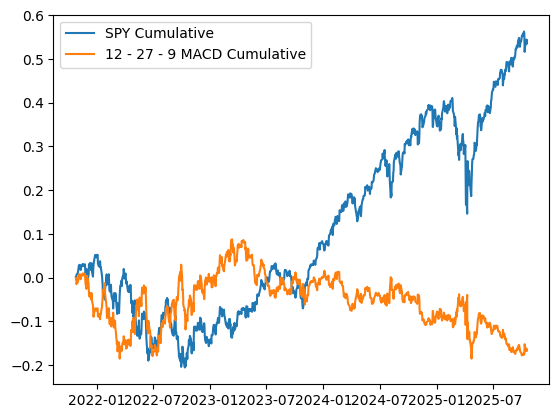

In [4]:
TICKER = 'SPY'
MACD_FAST = 12
MACD_SLOW = 27
MACD_SPAN = 9
LOOKBACK = 1000
def get_data(ticker=TICKER):
    df = yf.download(TICKER, start = '2000-01-01')
    df.columns = df.columns.get_level_values(0)
    return df.iloc[-LOOKBACK:, :]

def add_MACD(df, fast=MACD_FAST, slow = MACD_SLOW, span = MACD_SPAN):
    df[f'{fast}_ema'] = df['Close'].ewm(span=fast).mean()
    df[f'{slow}_ema'] = df['Close'].ewm(span=slow).mean()
    
    #macd is the difference between the fast and slow
    df[f'MACD'] = df[f'{fast}_ema'] - df[f'{slow}_ema']
    
    #macd signal is 9-period moving average of this line
    df['Signal'] = df['MACD'].ewm(span = span ).mean()
    
    df['MACD_hist'] = df['MACD'] - df['Signal']

    plt.bar(x=range(len(df)), height = df['MACD_hist'])

    plt.title(f'{MACD_FAST} - {MACD_SLOW} - {MACD_SPAN} MACD Values')
    plt.legend(['MACD', 'SIGNAL'])
    
    return df

def add_strategy(df):
    df['Strategy'] = 0
    df['Strategy'] = np.where(df['MACD_hist'] > 0, 1, -1)
    df['Strategy'] = df['Strategy'].shift(1)
    return df

def test_strategy(df):
    df['Asset_Returns'] = (1 + df['Close'].pct_change()).cumprod() - 1
    df['Strategy_Returns'] = (1 + df['Close'].pct_change() * df['Strategy']).cumprod() -1
    
    plt.figure()
    plt.plot(df['Asset_Returns'])
    plt.plot(df['Strategy_Returns'])
    plt.legend([f'{TICKER} Cumulative', f'{MACD_FAST} - {MACD_SLOW} - {MACD_SPAN} MACD Cumulative'])
    return df

def main():
    df = get_data()
    df = add_MACD(df)
    df = add_strategy(df)
    df = test_strategy(df)
    return df

df = main()
df


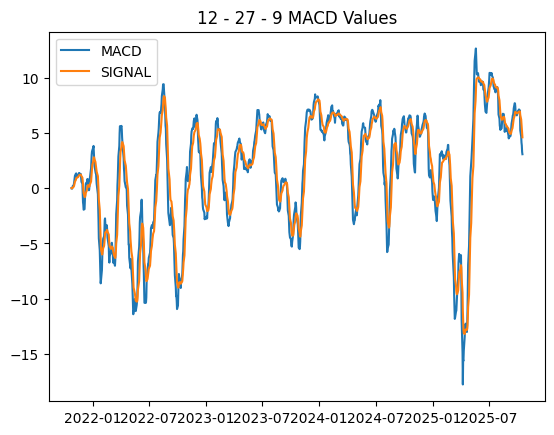

In [5]:
plt.plot(df['MACD'])
plt.plot(df['Signal'])

plt.title(f'{MACD_FAST} - {MACD_SLOW} - {MACD_SPAN} MACD Values')
plt.legend(['MACD', 'SIGNAL'])